# **Task 1 - Data Analysis and Preprocessing**

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger

# Assuming this class is defined in scripts/
from data_preprocessor import DataPreprocessor  
from data_visualizer import DataVisualizer

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Loading the Data

In [14]:
# Initialize the DataPreprocessor with the logger and the path to the dataset
data_preprocessor = DataPreprocessor(filepath='../data/Fraud_Data.csv', logger=logger)

In [15]:
# Load the dataset
fraud_data = data_preprocessor.load_dataset()

# Understand the Properties Data

- This step provides an overview of the dataset, including displaying the first few rows, dataset information, and a summary of basic statistic.

In [16]:
# First 5 rows of the dataset
fraud_data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [17]:
# Dataset Information
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


# Cleaning the Data

These are:
- handle missing values
- convert data types
- handle duplicates

In [18]:
# Check for missing values in the dataset
missing_values = fraud_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Confirm if there are any missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"There are {missing_values.sum()} missing values in the dataset.")

Missing Values in Each Column:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
No missing values found in the dataset.


- No missing values found in the dataset.

===>**Short summary**:

- **Missing Values**: No missing values found in the dataset.

- **Data Types**: All data types are correct except for *signup_time* and *purchase_time*, which are currently of type object.

- **Conversion**: The *signup_time* and *purchase_time* columns will be converted to standard datetime format.

# Conversion the Date type for *signup_time* and *purchase_time*

In [19]:
# Convert 'signup_time' and 'purchase_time' to datetime format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

# Verify the data types after conversion
print("Data Types After Conversion:")
print(fraud_data.dtypes)

Data Types After Conversion:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


# Duplicate rows

In [20]:
# Check for duplicate rows in the DataFrame
duplicate_count = fraud_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count:
    fraud_data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


**Short summary**:

- All data types are now in the appropriate format after conversion.

- Specifically, *signup_time* and *purchase_time* have been successfully converted to standard datetime format.

- No duplicated rows in the dataset

# Summary Statistics

In [21]:
# Summary Statistics of numerical features
fraud_data.describe(include='number')

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


**Short Summary**:

- **Data Overview**: The dataset contains *151,112* records with the following features:

- **user_id**: Ranges from 2 to 400,000, with a mean of 200,171.04.

- **purchase_value**: Ranges from 9 to 154, with a mean of 36.94 and a standard deviation of 18.32.

- **age**: Ranges from 18 to 76, with a mean of 33.14 and a standard deviation of 8.62.

- **ip_address**: Values range significantly, indicating a wide geographical distribution.

- **class**: Binary variable with a mean of 0.09, suggesting a low prevalence of the positive class.

In [22]:
# Statistical summary of object data features
fraud_data.describe(include='object')

,device_id,source,browser,sex
count,151112,151112,151112,151112
unique,137956,3,5,2
top,NGQCKIADMZORL,SEO,Chrome,M
freq,20,60615,61432,88293


**Statistical summary:**

- **Data Overview**: The dataset contains 151,112 records with the following features:

- **device_id**: 137,956 unique values, with the most frequent device ID being CQTUVBYIWWWBC, which appears 20 times.

- **source**: 3 unique sources, with SEO as the most common source, accounting for 60,615 records.

- **browser**: 5 unique browsers, with Chrome being the most used, appearing in 61,432 records.

- **sex**: 2 unique categories (M/F), with M (Male) being the predominant category, recorded 88,293 times.

# Exploratory Data Analysis (EDA)

# Univariate Analysis
- Numerical Features

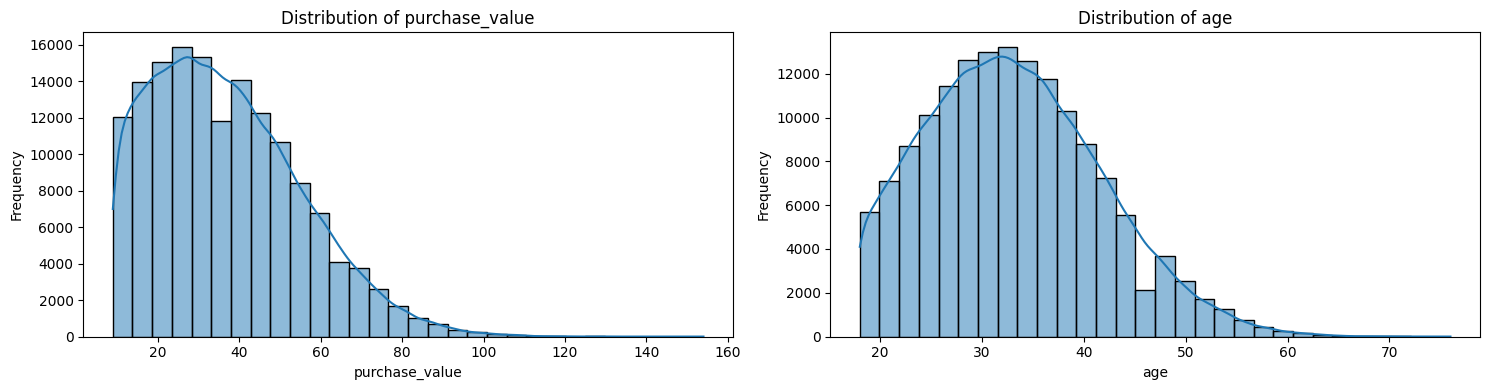

In [23]:
# Define numerical features
numerical_features = ['purchase_value', 'age']

# Define categorical features
categorical_features = ['source', 'browser', 'sex']

# Create instance of the DataVisualizer(data, target_col)
visualizer = DataVisualizer(fraud_data, numerical_features, categorical_features, 'class', logger)


visualizer._plot_histograms()  # To plot histograms

- Categorical features

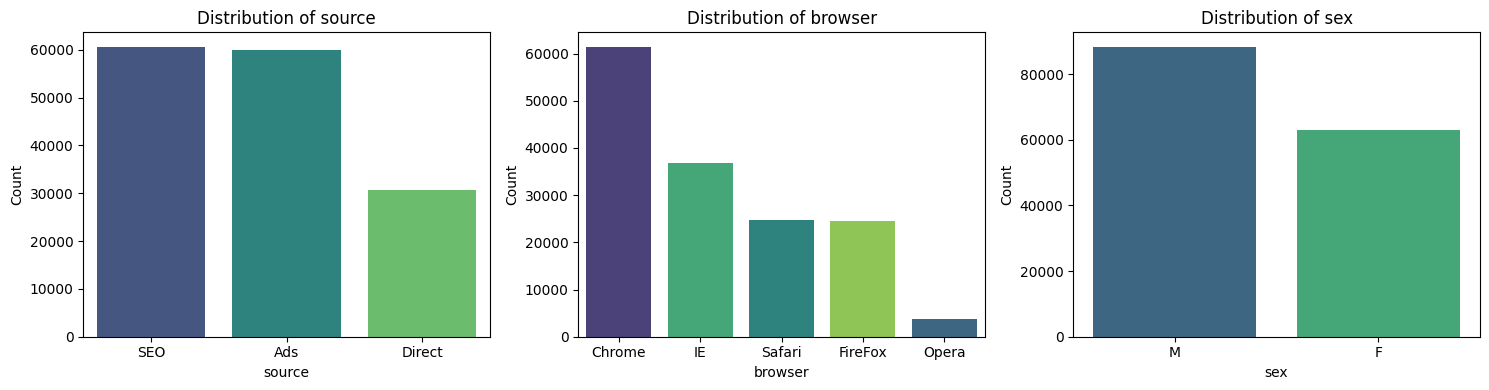

In [24]:
# Visualize the distribution
visualizer._plot_counts() # To plot counts for categorical features

# Bivariate Analysis

- Purchase Value vs Age

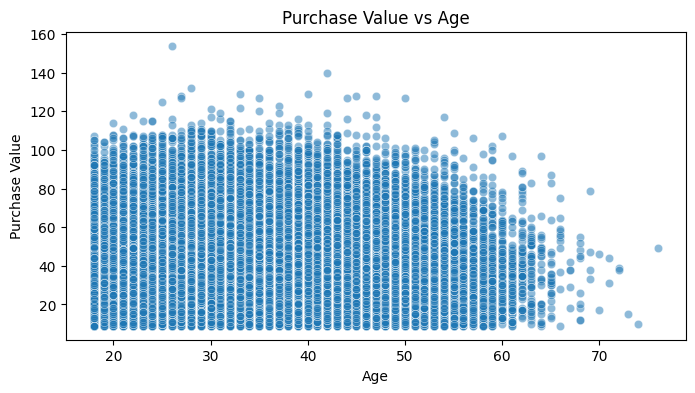

In [25]:
# Plot relationship between purchase_value vs age
visualizer.plot_relationship()

- Purchase Value by Sex

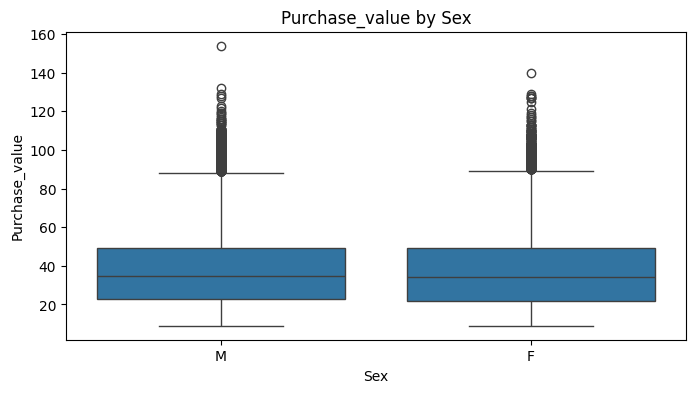

In [26]:
# Boxplot for purchase_value by sex
visualizer._boxplot('sex', 'purchase_value')

- Purchase Value by Target(Class)

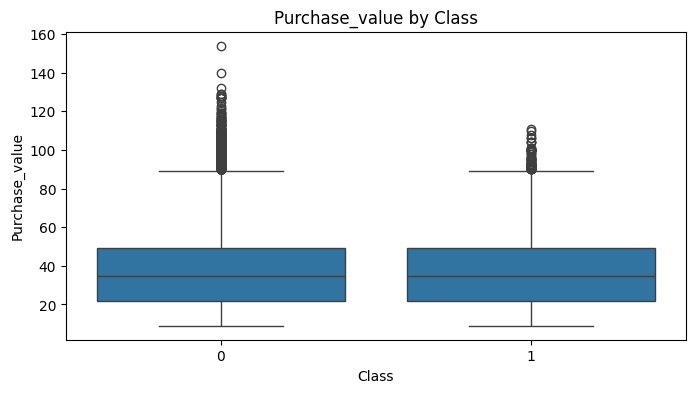

In [27]:
# Boxplot for purchase_value grouped by class
visualizer._boxplot('class', 'purchase_value')

# Plot Pairwise relationship between numerical features and target variable

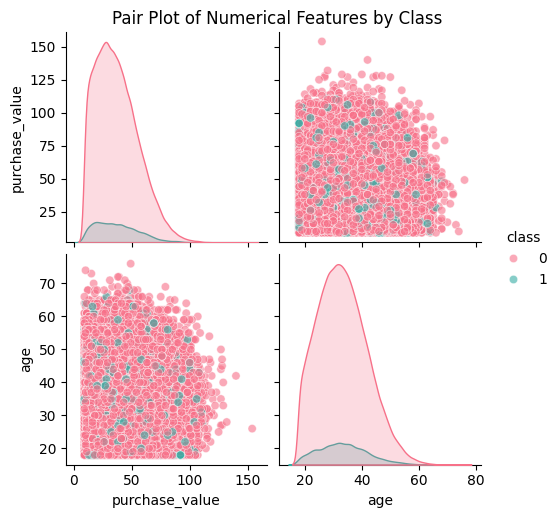

In [28]:
# Pairwise relationship
visualizer.plot_pairwise_relationships()